In [ ]:
# STR 교육자료의 이미지 압축파일을 다운로드하고 압축 해제합니다.
import gdown
import zipfile

# 첫 번째 파일 다운로드
gdown.download("https://drive.google.com/uc?id=1bA11LW9tNzCdE1myk7MZSn6QUrOqLVSg", "notebook_images.zip", quiet=False)

# 압축 해제
with zipfile.ZipFile("notebook_images.zip", "r") as zip_ref:
    zip_ref.extractall()  # 압축 파일의 내용을 현재 디렉토리에 풀기

# 두 번째 파일 다운로드
gdown.download("https://drive.google.com/uc?id=1y1Wipun6U-EHjjU-EU5FQdlDQs5Z_Z83", "datasets.zip", quiet=False)

# 압축 해제 (출력 없이 수행)
with zipfile.ZipFile("datasets.zip", "r") as zip_ref:
    zip_ref.extractall()

Downloading...
From: https://drive.google.com/uc?id=1bA11LW9tNzCdE1myk7MZSn6QUrOqLVSg
To: /content/notebook_images.zip
100%|██████████| 5.87M/5.87M [00:00<00:00, 215MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1y1Wipun6U-EHjjU-EU5FQdlDQs5Z_Z83
From (redirected): https://drive.google.com/uc?id=1y1Wipun6U-EHjjU-EU5FQdlDQs5Z_Z83&confirm=t&uuid=3fb7046f-eb9e-4d4c-8e91-033e8b02b221
To: /content/datasets.zip
100%|██████████| 2.03G/2.03G [00:36<00:00, 55.5MB/s]


In [ ]:
#STR 교육자료의 이미지 압축파일을 wget 명령어로 다운로드합니다.
!wget --load-cookies ~/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies ~/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1bA11LW9tNzCdE1myk7MZSn6QUrOqLVSg' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1bA11LW9tNzCdE1myk7MZSn6QUrOqLVSg" -O notebook_images.zip && rm -rf ~/cookies.txt
#unzip 명령어를 통해 압축 파일을 해제해 줍니다.
!unzip notebook_images.zip - r

# STR 교육자료의 이미지 압축파일을 wget 명령어로 다운로드합니다.
!wget --load-cookies ~/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies ~/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1y1Wipun6U-EHjjU-EU5FQdlDQs5Z_Z83' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1y1Wipun6U-EHjjU-EU5FQdlDQs5Z_Z83" -O datasets.zip && rm -rf ~/cookies.txt
# unzip 명령어를 통해 압축 파일을 해제해 줍니다. 파일 하나 하나 출력되어 로그가 매우 길게 표시 되므로 -qq 옵션을 통해 출력 없이 압축 풀기를 수행합니다.
!unzip -qq datasets.zip

--2024-11-20 17:00:06--  https://docs.google.com/uc?export=download&confirm=&id=1bA11LW9tNzCdE1myk7MZSn6QUrOqLVSg
Resolving docs.google.com (docs.google.com)... 142.250.125.139, 142.250.125.113, 142.250.125.100, ...
Connecting to docs.google.com (docs.google.com)|142.250.125.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1bA11LW9tNzCdE1myk7MZSn6QUrOqLVSg&export=download [following]
--2024-11-20 17:00:06--  https://drive.usercontent.google.com/download?id=1bA11LW9tNzCdE1myk7MZSn6QUrOqLVSg&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.132.132, 2607:f8b0:4001:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.132.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5871028 (5.6M) [application/octet-stream]
Saving to: ‘notebook_images.zip’

notebook_images.zip 100%[===================>]   5.

## Task 소개 : Scene-Text Recognition

* Scene-Text Recognition은 종이 문서에서 글자를 인식하는 일반적인 Optical Character Recognition (OCR) 기술을 넘어서, 일상의 풍경이나 장면 이미지에서도 글자를 정확하게 인식하는 기술을 의미합니다.

* 정확한 텍스트 인식을 위해서는
    - 1) 이미지 내 텍스트 영역 감지 (Detection)
    - 2) 텍스트 영역 내 텍스트 인식 (Recognition)

* 이 두 과정이 필수적으로 필요합니다. 그럼에도 불구하고, 최근에는 이 두 과정을 따로 수행했던 기존의 방식과는 달리, 두 과업을 동시에 진행하는 End-to-end 방식의 모델 연구가 주목을 받고 있습니다. 이를 Text-spotting이라고도 합니다.

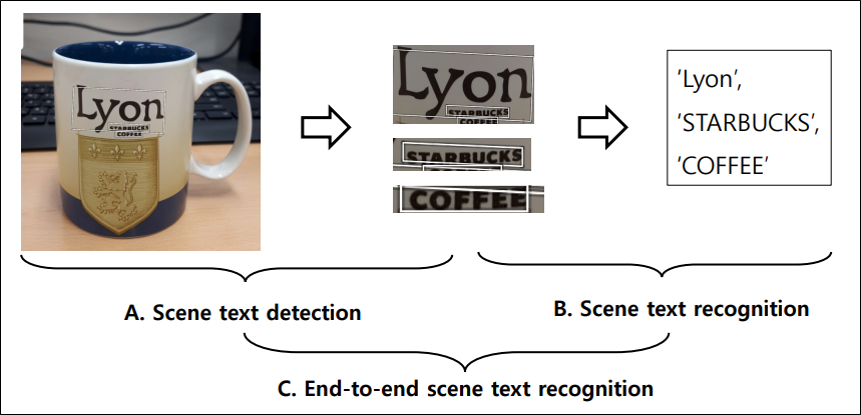

In [ ]:
from IPython.display import Image as show_image # ipynb 파일의 cell에서 이미지를 시각화하기 위한 라이브러리
show_image('notebook_images/STR_example.PNG')

* 본 교육 자료에서는 현장에서의 계기판 내 숫자 텍스트를 자동으로 감지하고 인식하는 인공지능 모델을 구축하는 방법에 대해 알아봅니다.
* 본 모델은 주로 숫자 인식에 중점을 둔 설계입니다.
* 그러나 필요에 따라 한글이나 영어 같은 다양한 텍스트도 학습 데이터에 포함시키면, 해당 텍스트 인식도 가능하도록 모델을 확장할 수 있습니다.

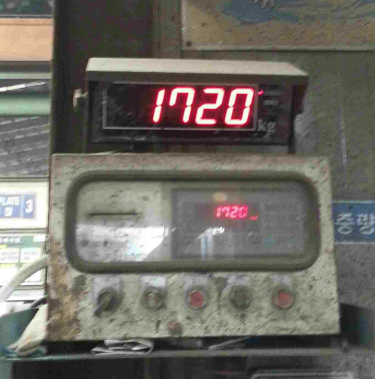

In [ ]:
show_image('notebook_images/task_image.PNG')

## Object Detection, 객체 인식(탐지) 소개

* Object Detection, 객체 인식은 이미지 또는 비디오에서 개체를 식별하고 찾는 것과 관련된 컴퓨터 비전 작업입니다. 감지된 물체는 사람일 수도 있고, 건물, 동물일 수도 있습니다.


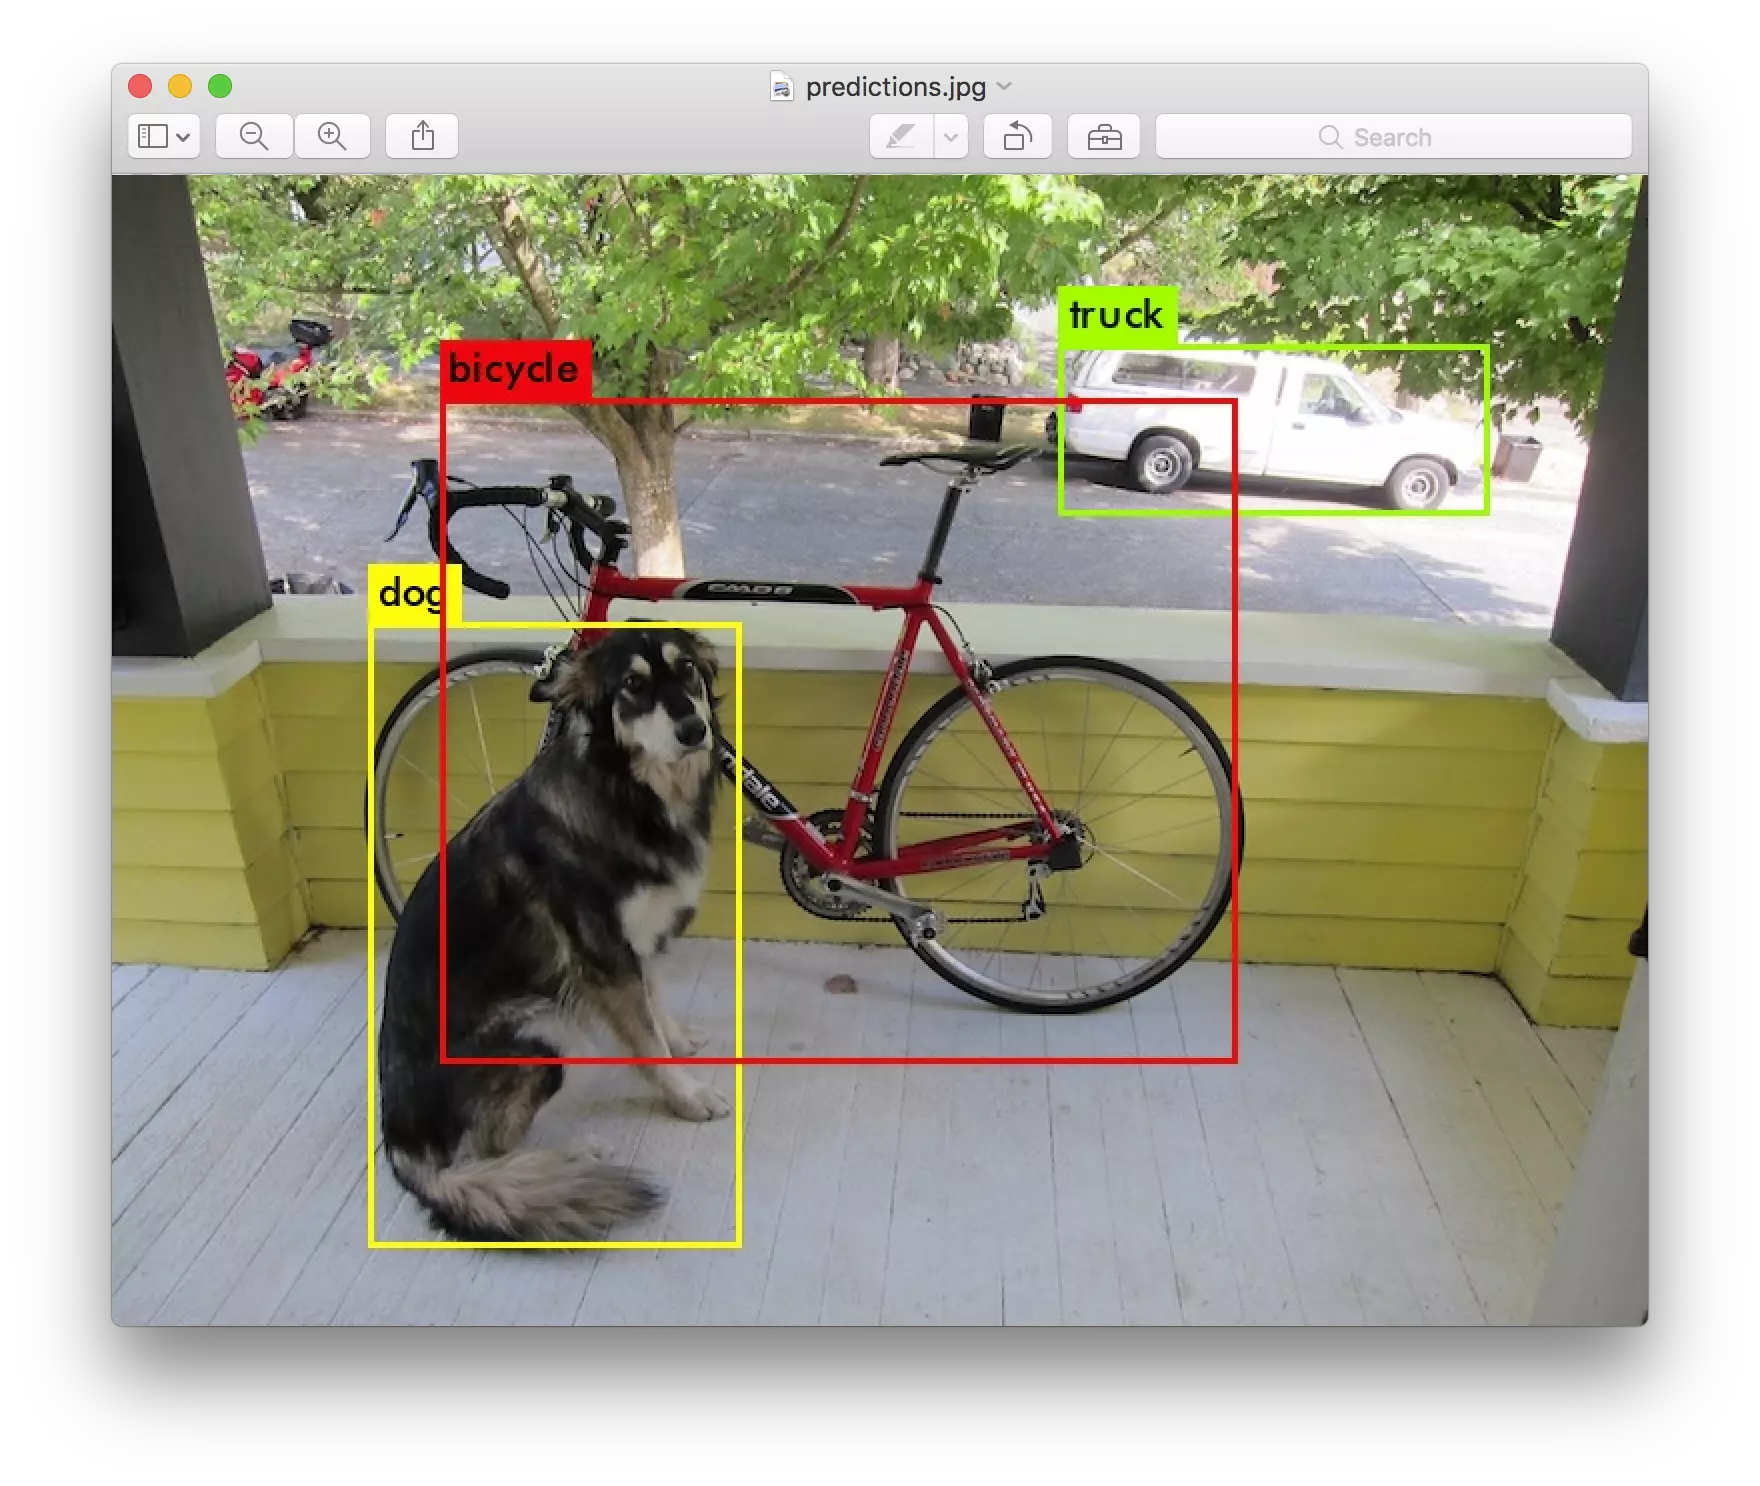

In [ ]:
show_image('notebook_images/OD_image.PNG', width=800) #출처: Joseph Redmon, YOLO: Real-Time Object Detection

* Object Detection은
    - **1) 여러 물체에 대해 어떤 물체인지 분류하는 (Classification) 문제와**
    - **2) 그 물체가 어디 있는지 Bounding box를 통해 위치정보를 나타내는 (Localization) 문제를**

* 둘 다 해내야 하는 분야를 뜻합니다.

* 쉽게 말해서 **Object Detection= 여러가지 물체에 대한 Classification + 물체의 위치정보를 파악하는 Localization** 이라고 할 수 있습니다.

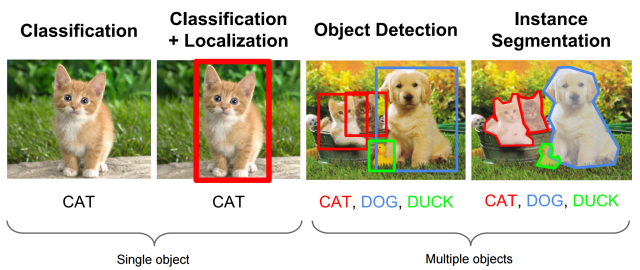

In [ ]:
show_image('notebook_images/OD_task.png')#출처: Hoya012's Research Blog

* Object Detection을 수행하기 위해서는 크게 두 가지 접근법이 존재합니다.

 **1. 1-Stage Detector: Classification과 Localization 문제를 동시에 진행하는 방법**
    <img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fds1hoJ%2FbtqCX8tXMTh%2FJlGldm3aTsGzwiratKhbqK%2Fimg.png" width="600" height="300">

 **2. 2-Stage Detector: Classification과 Localization 문제를 순차적으로 진행하는 방법**
    <img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F4Fi2X%2FbtqCWbZjit2%2FsN9Ba7jKxiVI0h4S5InzMk%2Fimg.png" width="600" height="300">

## Object Detection 관련 배경 지식

## Bounding Box

- 이미지에서 하나의 객체 전체를 포함하는 가장 작은 직사각형

  <img src="https://miro.medium.com/max/850/1*KL6r494Eyfh3iYEXQA2tzg.png" width="500">

## IOU(Intersection Over Union)

- 실측값(Ground Truth)과 모델이 예측한 값이 얼마나 겹치는지를 나타내는 지표

  <img src="https://pyimagesearch.com/wp-content/uploads/2016/09/iou_equation.png" width="400">

- IOU가 높을수록 잘 예측한 모델

  <img src="https://pyimagesearch.com/wp-content/uploads/2016/09/iou_examples.png" width="400">

<br>

- 예시

  <img src="https://www.pyimagesearch.com/wp-content/uploads/2016/09/iou_stop_sign.jpg">

## NMS(Non-Maximum Suppression, 비최댓값 억제)

- 확률이 가장 높은 상자와 겹치는 상자들을 제거하는 과정
- 최댓값을 갖지 않는 상자들을 제거
- 과정
  1. 확률 기준으로 모든 상자를 정렬하고 먼저 가장 확률이 높은 상자를 취함
  2. 각 상자에 대해 다른 모든 상자와의 IOU를 계산
  3. 특정 임곗값을 넘는 상자는 제거

  <img src="https://pyimagesearch.com/wp-content/uploads/2014/10/nms_fast_03.jpg" width="600">

### 정밀도(Precision)와 재현율(Recall)

- 객체 탐지 모델의 성능을 평가하는 데 정밀도와 재현율이 직접 사용되지는 않지만, 다른 중요한 성능 지표를 계산하는 데 필요한 기본 개념입니다.

  - True Positives(`TP`): 모델이 특정 클래스의 실제 객체를 올바르게 예측한 경우
  - False Positives(`FP`): 모델이 실제 객체가 아닌데도 객체가 있다고 잘못 예측한 경우
  - False Negatives(`FN`): 실제로 객체가 존재하는데도 모델이 탐지하지 못한 경우

  $\qquad precision = \frac{TP}{TP \ + \ FP}$
  $\qquad recall = \frac{TP}{TP \ + \ FN}$

- 직관적인 이해
  - 정밀도(Precision): 모델이 "객체가 있다"고 판단한 경우 중에서 실제로 객체가 있는 비율입니다. 모델이 잘못 탐지하는 경우(FP)가 많으면 정밀도가 낮아집니다. 즉, 모델이 불확실한 부분에 대해 객체가 있다고 과하게 반응하는 경우입니다.

  - 실제로 존재하는 객체 중에서 모델이 정확히 탐지해 낸 비율입니다. 모델이 너무 엄격해서 정확한 조건을 충족해야만 객체가 있다고 판단한다면(FN이 많아지면) 재현율이 낮아집니다. 즉, 모델이 엄격하게 기준을 적용해 놓치고 지나가는 객체가 많을 수 있습니다.

### 정밀도 재현율 연습문제

- 한 객체 탐지 모델이 고양이 사진에서 고양이를 탐지하는 작업을 하고 있습니다. 다음은 모델이 예측한 결과와 실제 상황입니다.
  - 모델은 총 10개의 고양이를 탐지했다고 예측했습니다.
  - 이 중 실제로 고양이가 존재하는 예측은 7개였고, 나머지 3개는 고양이가 아닌데도 고양이라고 잘못 예측했습니다.
  - 실제로 사진에 존재하는 고양이의 총 수는 12마리입니다.

- 다음 질문에 답하세요
 1. 이 이 모델의 정밀도(Precision)를 계산하세요.
 2. 이 모델의 재현율(Recall)을 계산하세요.

### 정밀도-재현율 곡선(Precision-Recall Curve)

- 신뢰도 임계값마다 모델의 정밀도와 재현율을 시각화
- 모든 bounding box와 함께 모델이 예측의 정확성을 얼마나 확실하는지 0 ~ 1사이의 숫자로 나타내는 신뢰도를 출력
- 임계값 T에 따라 정밀도와 재현율이 달라짐
  - 임계값 T 이하의 예측은 제거함
  - T가 1에 가까우면 정밀도는 높지만 재현율은 낮음  
  - 놓치는 객체가 많아져서 재현율이 낮아짐. 즉, 신뢰도가 높은 예측만 유지하기때문에 정밀도는 높아짐
  - T가 0에 가까우면 정밀도는 낮지만 재현율은 높음  
  - 대부분의 예측을 유지하기때문에 재현율은 높아지고, 거짓긍정(FP)이 많아져서 정밀도가 낮아짐
- 예를 들어, 모델이 보행자를 탐지하고 있으면 특별한 이유없이 차를 세우더라도 어떤 보행자도 놓치지 않도록 재현율을 높여야 함
- 모델이 투자 기회를 탐지하고 있다면 일부 기회를 놓치게 되더라도 잘못된 기회에 돈을 거는 일을 피하기 위해 정밀도를 높여야 함

<img src="https://www.researchgate.net/profile/Davide_Chicco/publication/321672019/figure/fig1/AS:614279602511886@1523467078452/a-Example-of-Precision-Recall-curve-with-the-precision-score-on-the-y-axis-and-the.png">

### AP (Average Precision, 평균 정밀도) 와 mAP(mean Average Precision)

#### 객체 탐지 모델의 성능을 평가하는 데 자주 사용되는 AP와 mAP는 모델이 얼마나 정확하게 객체를 탐지하는지를 평가하는 지표입니다.

1. AP (Average Precision, 평균 정밀도)
- AP는 단일 클래스에 대한 모델의 성능을 평가합니다.
- 정밀도-재현율 곡선의 아래 면적을 계산하여 정밀도 변화를 종합적으로 평가한 값입니다.
- 결과값은 항상 0부터 1 사이이며, 1에 가까울수록 더 높은 성능을 의미합니다.표입니다.

2. mAP (mean Average Precision)
  - mAP는 여러 클래스에 대한 AP 값을 평균낸 지표로, 전체 모델 성능을 평가하는 데 사용됩니다.
  - 예를 들어, 데이터셋에 10개의 클래스가 있다면 각 클래스의 AP를 구한 후, 그 값을 평균내어 mAP를 계산합니다.
  - PASCAL VOC나 COCO와 같은 객체 탐지 대회에서 성능 평가에 mAP가 사용됩니다.
    - PASCAL VOC에서는 보통 한 가지 IoU 기준(0.5)으로 평가하여 mAP를 계산합니다.
    - COCO는 IoU를 0.5부터 0.95까지 다양한 기준으로 평가한 평균을 사용하기 때문에 일반적으로 PASCAL VOC보다 점수가 더 낮게 나옵니다.

#### 요약 :
 - AP는 개별 클래스에 대한 평균 정밀도, mAP는 모든 클래스의 평균 정밀도입니다.
 - mAP는 다양한 IoU 기준을 종합하여 모델의 전반적인 탐지 성능을 평가할 수 있는 중요한 지표입니다.

    <img src="https://www.researchgate.net/profile/Bong_Nam_Kang/publication/328939155/figure/tbl2/AS:692891936649218@1542209719916/Evaluation-on-PASCAL-VOC-2007-and-MS-COCO-test-dev.png">


## 객체 탐지 (Object Detection)의 발전 과정

<img src="https://www.researchgate.net/publication/371895489/figure/fig3/AS:11431281212097261@1702540249094/The-development-history-of-object-detection.tif">

# 객체 검출(Object Detection) 알고리즘 정리

### **R-CNN (2013)**
- **논문**: [Rich feature hierarchies for accurate object detection and semantic segmentation](https://arxiv.org/abs/1311.2524)
- **핵심 아이디어**: 기존의 슬라이딩 윈도우 방식은 배경 영역 검출에 과도한 시간이 소요되었음. 이를 해결하기 위해 **Region Proposal** 방식을 도입.
- **Region Proposal**: 이미지 내에서 객체가 있을 가능성이 높은 영역(Region)을 선택적으로 추출하여 연산량을 줄이고 정확도를 높이는 방식.
- **특징**:
  - CNN을 Object Detection 분야에 최초로 적용시킨 모델
  - 높은 정확도의 객체 검출이 가능.
  - 복잡한 구조와 학습 과정으로 인해 처리 시간이 오래 걸림.


### **SPP-Net (2014)**
- **논문**: [Spatial Pyramid Pooling in Deep Convolutional Networks for Visual Recognition](https://arxiv.org/abs/1406.4729)
- **핵심 아이디어**: 입력 이미지의 크기가 다양하여 FC 레이어에 입력하기 어려운 문제를 해결하기 위해 **Spatial Pyramid Pooling(SPP)** 기법을 도입.
- **SPP**: 컨볼루션 레이어의 출력 피처 맵을 다양한 크기의 윈도우로 풀링하여 고정된 크기로 변환하는 방법.
- **특징**:
  - R-CNN에 비해 실행 시간이 단축.
  - 다양한 크기의 피처 맵을 고정된 크기로 변환해 연산 효율을 높임.


### **Fast R-CNN (2015)**
- **논문**: [Fast R-CNN](https://arxiv.org/abs/1504.08083)
- **핵심 아이디어**: SPP 레이어를 간단한 **RoI Pooling**으로 대체하여 구조를 단순화하고, SVM 대신 소프트맥스를 사용하여 분류와 회귀를 동시에 수행하는 멀티태스크 손실 함수를 도입.
- **RoI Pooling**: Region Proposal 영역을 고정된 크기로 변환하여 FC 레이어에 입력할 수 있게 하는 기법.
- **특징**:
  - 구조가 간단해지고, R-CNN보다 처리 시간이 크게 줄어듦.


### **Faster R-CNN (2015)**
- **논문**: [Faster R-CNN: Towards Real-Time Object Detection with Region Proposal Networks](https://arxiv.org/abs/1506.01497)
- **핵심 아이디어**: **Region Proposal Network(RPN)**을 도입하여 객체가 있을 가능성이 높은 영역을 예측하고, 이를 Fast R-CNN과 결합해 엔드투엔드로 학습 가능하게 함.
- **RPN**: 컨볼루션 네트워크를 사용하여 Region Proposal을 생성하는 네트워크로, 객체가 있는지 없는지를 판단.
- **특징**:
  - RPN으로 선택적 검색 대체.
  - 앵커 박스(객체 후보 영역) 도입으로 정확도와 속도 향상.


### **SSD (2016)**
- **논문**: [SSD: Single Shot MultiBox Detector](https://arxiv.org/abs/1512.02325)
- **핵심 아이디어**: 두 단계 검출 과정을 단일 단계로 통합해 **Single Shot**으로 객체를 검출.
- **Single Shot**: Region Proposal 없이 단일 네트워크에서 객체 검출과 분류를 동시에 수행.
- **특징**:
  - 실시간 처리(30~40fps) 가능.
  - 작은 객체 검출 성능 향상을 위해 데이터 증강 기법 사용(mAP 63% → 74%).


### **RetinaNet (2017)**
- **논문**: [Focal Loss for Dense Object Detection](https://arxiv.org/abs/1708.02002)
- **핵심 아이디어**: 객체 검출 시 배경과 객체의 불균형 문제를 해결하기 위해 **Focal Loss**를 도입. 또한, 다양한 크기의 객체를 효과적으로 검출하기 위해 **Feature Pyramid Network(FPN)**을 활용.
- **Focal Loss**: 어려운 예제(객체)를 학습에 집중하도록 손실을 조정하는 함수.
- **FPN**: 다양한 크기의 객체를 검출하기 위해 다중 스케일 피처 맵을 사용하는 기법.
- **특징**:
  - 배경 손실 감소로 학습 효율 향상.
  - Focal Loss로 작은 객체와 큰 객체를 모두 효과적으로 검출.


### **Mask R-CNN (2018)**
- **논문**: [Mask R-CNN](https://arxiv.org/pdf/1703.06870.pdf)
- **핵심 아이디어**: Faster R-CNN에 픽셀 단위의 객체 마스크 분할을 위한 브랜치를 추가하여, **인스턴스 분할**을 가능하게 함.
- **인스턴스 분할**: 이미지 내 객체의 경계 상자를 넘어서 픽셀 단위로 객체를 분리하는 기술.
- **특징**:
  - 객체 경계 상자, 클래스 예측 외에 각 객체의 정확한 마스크를 예측.


### **YOLOv3 (2018)**
- **논문**: [YOLOv3: An Incremental Improvement](https://arxiv.org/abs/1804.02767)
- **핵심 아이디어**: 다양한 크기의 객체를 효과적으로 검출하기 위해 **Feature Pyramid Network(FPN)** 도입. 이전 YOLO 버전의 정확도 문제를 개선.
- **특징**:
  - RetinaNet보다 정확도는 낮지만 속도가 더 빠름.


### **RefineDet (2018)**
- **논문**: [Single-Shot Refinement Neural Network for Object Detection](https://arxiv.org/pdf/1711.06897.pdf)
- **핵심 아이디어**: 단일 단계 검출기의 효율성과 두 단계 검출기의 정확도를 결합하기 위해 앵커 박스를 조정하는 **Anchor Refinement Module**과 객체 검출을 수행하는 **Object Detection Module** 도입.
- **특징**:
  - 정확도와 효율성을 동시에 갖춤.


### **EfficientDet (2019)**
- **논문**: [EfficientDet: Scalable and Efficient Object Detection](https://arxiv.org/pdf/1911.09070v1.pdf)
- **핵심 아이디어**: 효율성을 극대화하기 위해 **EfficientNet** 기반 백본과 **BiFPN(Weighted Feature Fusion)** 도입.
- **특징**:
  - 높은 성능과 낮은 연산량.


### **YOLOv4 (2020)**
- **논문**: [YOLOv4: Optimal Speed and Accuracy of Object Detection](https://arxiv.org/pdf/2004.10934v1.pdf)
- **핵심 아이디어**: YOLOv3의 성능을 다양한 최적화 기법(WRC, CSP 등)으로 개선.
- **특징**:
  - CSPNet 기반 백본(CSPDarkNet53) 사용.
  - AP 10% 증가, FPS 12% 증가.


### **YOLOv5 (2020)**
- **핵심 아이디어**: YOLOv4와 비슷한 성능을 유지하면서도 더 가볍고 빠르게 설계.
- **특징**:
  - PyTorch로 구현되어 사용 편의성 향상.
  - 낮은 용량과 빠른 속도.


### **YOLOv8 (2023)**
- **핵심 아이디어**: YOLO 시리즈의 최신 버전으로, 백본 구조와 최적화 기법을 통해 효율성과 정확성을 극대화.
- **특징**:
  - 다양한 크기의 모델 제공(nano, small, medium 등).
  - 더욱 빠르고 정확한 실시간 검출 가능.


## YOLO(You Only Look Once) 소개

* YOLO(You Only Look Once)는 최첨단 실시간 Object Detection 시스템입니다. 기존의 모델보다 빠르고 정확한 데이터 처리 속도를 자랑하며 화제를 몰고 왔습니다. YOLO는 물체 감지와 객체 인식에 대한 딥러닝 기반 접근 방식입니다.

* YOLO는 입력된 이미지를 일정 분할로 그리드한 다음, 신경망을 통과하여 바운딩 박스와 클래스 예측을 생성하여 최종 감지 출력을 결정합니다. 실제 이미지 및 비디오에서 테스트하기 전에 먼저 전체 데이터 세트에 대해 여러 인스턴스를 학습합니다.

* YOLO는 Joseph Redmon 등에 의해 처음 소개되었습니다. 2015년 Joseph Redmon의 논문에 처음 등장한 후 몇 차례 업데이트 되었으며, 이후 많은 개발자들에 의해 2023년 6월 기준 v8까지 출시되었습니다.

  <img src="https://velog.velcdn.com/images/qtly_u/post/c8552acf-3671-4bed-a307-d4fdde78b71f/image.webp" width="600">

## YOLO의 강점

* 빠른 속도: 1-Stage Detector로 물체를 실시간으로 예측하여 감지 속도 향상

* 높은 정확도: 최소한의 배경 오류로 정확한 결과를 제공

* 학습 기능: YOLO는 객체의 표현을 학습하고 이를 객체 감지에 적용할 수 있는 뛰어난 학습 기능을 갖추고 있습니다.

* 경량 모델 지원: YOLOv8은 yolov8n(nano), yolov8s(small), yolov8m(medium), yolov8l(large), yolov8x(extra large) 등 경량 모델부터 중량 모델까지 지원하여 본인의 환경에 적합한 모델을 사용할 수 있습니다.

* 확장성 : YOLOv8을 기점으로 실시간 객체 탐지(detection), 세그멘테이션(segmentation), 자세 추정(pose estimation), 분류(classification) 등 다양한 task에 활용할 수 있도록 확장되었습니다.


* [YOLOv8 공식 홈페이지](https://docs.ultralytics.com/)
            
* [YOLOv8 공식 깃허브](https://github.com/ultralytics/ultralytics)

# 1. 필요 라이브러리 설치 및 가져오기

In [2]:
pip install ultralytics # 처음 설치 시 실행 후 런타임 재시작 필요

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 17.8 MB/s eta 0:00:00


In [3]:
import ultralytics # YOLOv8 라이브러리와 필요한 모듈을 불러옵니다.
from matplotlib import pyplot as plt # plot images
from PIL import Image
import requests
import numpy as np
import cv2 # opencv
import os # folder directory navigation

ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/225.8 GB disk)


# 2. 모델 불러오기 및 추론 실행

In [4]:
from ultralytics import YOLO

# Load a pre-trained model
model = YOLO('yolov8n.pt') #yolov8n(나노), yolov8s(스몰), yolov8m(미디움), yolov8l(라지), yolov8x(엑스트라 라지) 등이 있음

100%|██████████| 6.25M/6.25M [00:00<00:00, 103MB/s]


In [5]:
print(type(model.names), len(model.names)) #yolov8은 MX COCO 데이터로 사전학습되어 있기 때문에, MS COCO Dataset에 정의되어
print(model.names)                         #있는 클래스 개수와 종류는 model.names를 통해서 확인할 수 있음 (총 80개, 0~79)

<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

### 일반 이미지에 적용


0: 480x640 10 persons, 1 baseball bat, 455.3ms
Speed: 4.7ms preprocess, 455.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


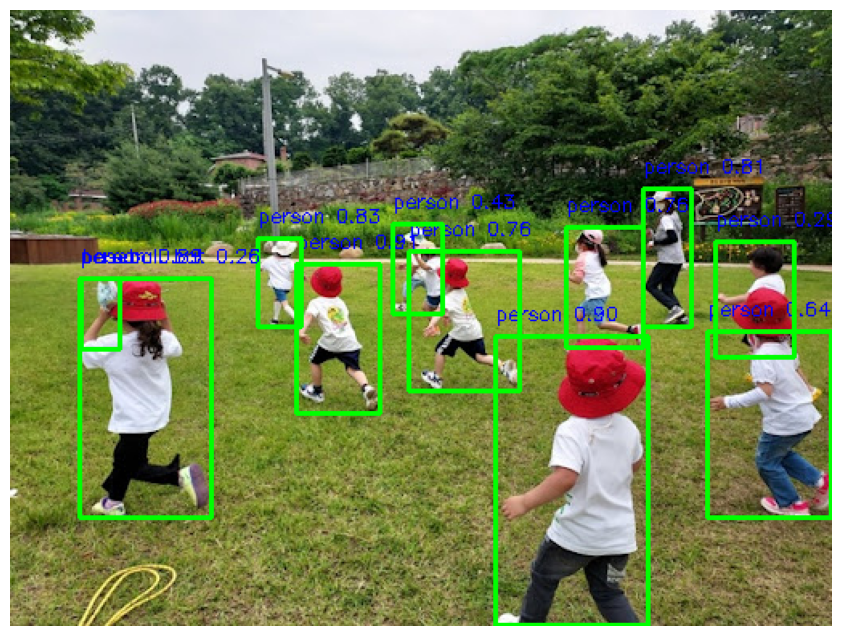

In [7]:
img_url = 'https://lh5.googleusercontent.com/proxy/eOYvFo9FF4KgYjWDaA7-0l8zIknCgH3F-MlkbE_5kVi8Ay4gVG7x0copMQrp4BiJYhlkFlBJHme0Uo4Q2GqWleAzDj7tz9mK4u35EDTW9g'
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')
raw_image = np.array(raw_image)

# 2. 이미지 불러오기
# image_path = "your_image.jpg"  # 객체 탐지에 사용할 이미지 경로
# img = cv2.imread(image_path)
# img_rgb = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR로 불러오기 때문에 RGB로 변환

# 3. YOLOv8 모델로 예측 수행
results = model(raw_image)

# 4. 예측된 바운딩 박스 정보 추출 및 시각화
for result in results:
    for box in result.boxes:
        # 바운딩 박스 좌표 및 클래스 정보 가져오기
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # 바운딩 박스 좌표
        label = result.names[int(box.cls[0])]  # 예측된 클래스 이름
        confidence = box.conf[0]  # 예측 신뢰도

        # 바운딩 박스와 텍스트 표시
        cv2.rectangle(raw_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # 녹색 박스
        cv2.putText(raw_image, f"{label} {confidence:.2f}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 255), 1)  # 클래스와 신뢰도 표시

# 5. 결과 이미지 시각화
plt.figure(figsize=(12,8))
plt.imshow(raw_image)
plt.axis('off')
plt.show()

### 보유중인 데이터셋에 적용

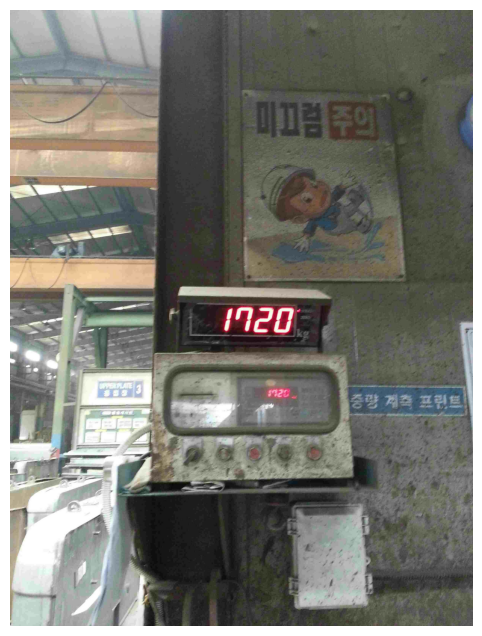

In [ ]:
# 이미지 파일을 읽어옵니다. cv2.imread 함수는 이미지 파일을 읽어와서 행렬 형태로 저장합니다.
law_image2 = cv2.imread("dataset/data/images/00001.jpg")

# 이미지의 색상 채널을 변경합니다. OpenCV는 기본적으로 BGR 순서로 색상을 저장하는데, 이를 RGB 순서로 변경하여 색상을 표현하도록 합니다.
# cv2.COLOR_BGR2RGB는 BGR 색상에서 RGB 색상으로 변환하는 코드로 이렇게 변환하면 이미지가 일반적으로 사용되는 RGB 색상 순서로 표현됩니다.
law_image2 = cv2.cvtColor(law_image2, cv2.COLOR_BGR2RGB)
results = model.predict(law_image2)
# 4. 예측된 바운딩 박스 정보 추출 및 시각화
for result in results:
    for box in result.boxes:
        # 바운딩 박스 좌표 및 클래스 정보 가져오기
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # 바운딩 박스 좌표
        label = result.names[int(box.cls[0])]  # 예측된 클래스 이름
        confidence = box.conf[0]  # 예측 신뢰도

        # 바운딩 박스와 텍스트 표시
        cv2.rectangle(law_image2, (x1, y1), (x2, y2), (0, 255, 0), 2)  # 녹색 박스
        cv2.putText(law_image2, f"{label} {confidence:.2f}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 255), 2)  # 클래스와 신뢰도 표시

# 5. 결과 이미지 시각화
plt.figure(figsize=(12,8))
plt.imshow(law_image2)
plt.axis('off')
plt.show()

**모델이 MX COCO 데이터로 사전 학습되었기 때문에**


**현재로써는 디지털 숫자에 대한 탐지를 전혀 하지 못합니다. 따라서 갖고 있는 데이터를 이용하여 Fine-tuning을 수행할 필요성이 있습니다.**

**다음 장에서는 제공된 데이터를 활용하여 모델을 Fine-tuning하고, 성능 향상을 위해 데이터에 대한 EDA를 진행하겠습니다.**